In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn import metrics
import math
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('true_car_listings.csv')
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [149]:
df.shape

(852122, 8)

In [150]:
df.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


Checking For Duplicates

In [152]:
df.loc[df.duplicated()]

,Price,Year,Mileage,City,State,Vin,Make,Model
120948,16288,2015,54545,Pensacola,FL,2G1FB1E32F9284364,Chevrolet,CamaroCoupe
120949,19995,2016,17604,Beaumont,TX,2G11Z5SA9G9130915,Chevrolet,ImpalaLS
120950,5774,2008,125675,Fort Wayne,IN,2G1WT58K781214125,Chevrolet,Impala4dr
120951,20990,2017,17219,Marshfield,MO,2G1105S30H9120402,Chevrolet,ImpalaLT
120952,22573,2016,622,Colorado Springs,CO,1GCNCNEC9GZ402232,Chevrolet,Silverado
120953,11495,2014,80086,Langhorne,PA,1G1JC6SH8E4194609,Chevrolet,SonicHatchback
120954,28800,2017,4165,Smyrna,GA,2GNFLGE38H6240856,Chevrolet,EquinoxAWD
120955,14771,2014,78400,New Haven,IN,1G1125S39EU113487,Chevrolet,Impala2LT
120956,15907,2015,65274,Corpus Christi,TX,2G1FB1E30F9190774,Chevrolet,CamaroCoupe
120957,12894,2014,57113,Delray Beach,FL,1G1RA6E44EU129757,Chevrolet,VoltPlug-In


Removing Duplicates

In [153]:
df=df.drop_duplicates()
df.shape

(852092, 8)

In [154]:
df.loc[df.duplicated()]

,Price,Year,Mileage,City,State,Vin,Make,Model


EXPLORATORY DATA ANALYSIS (EDA)

<AxesSubplot: title={'center': 'Car Price Distribution Plot'}, xlabel='Price', ylabel='Density'>

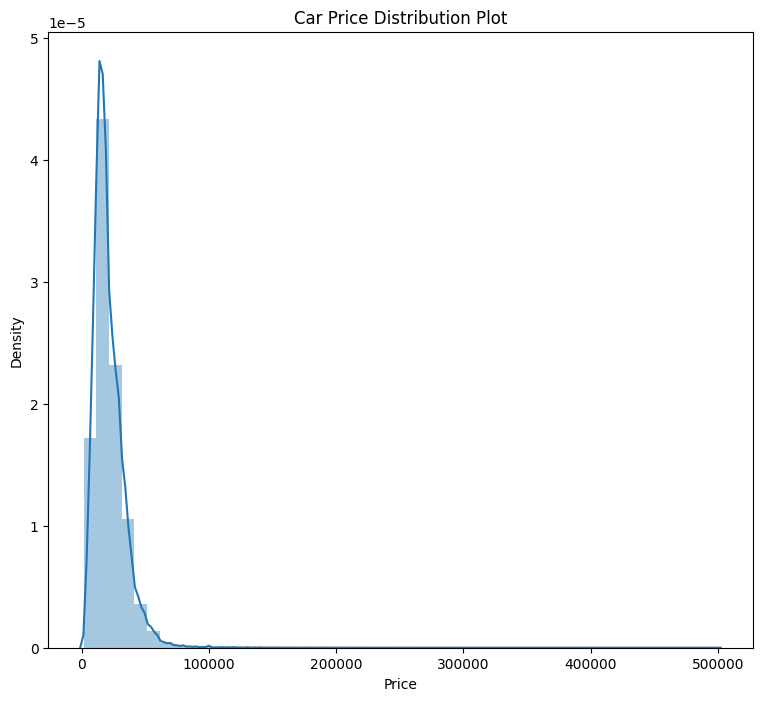

In [155]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.Price)

Most of the car prices ranges in between 0-100000

<AxesSubplot: >

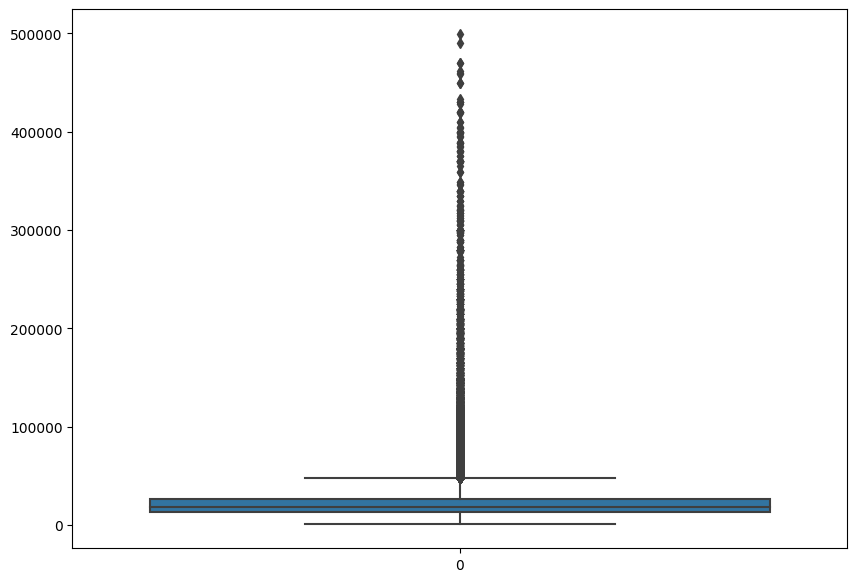

In [156]:
plt.figure(figsize=(10, 7))
sns.boxplot(df['Price'])

<AxesSubplot: >

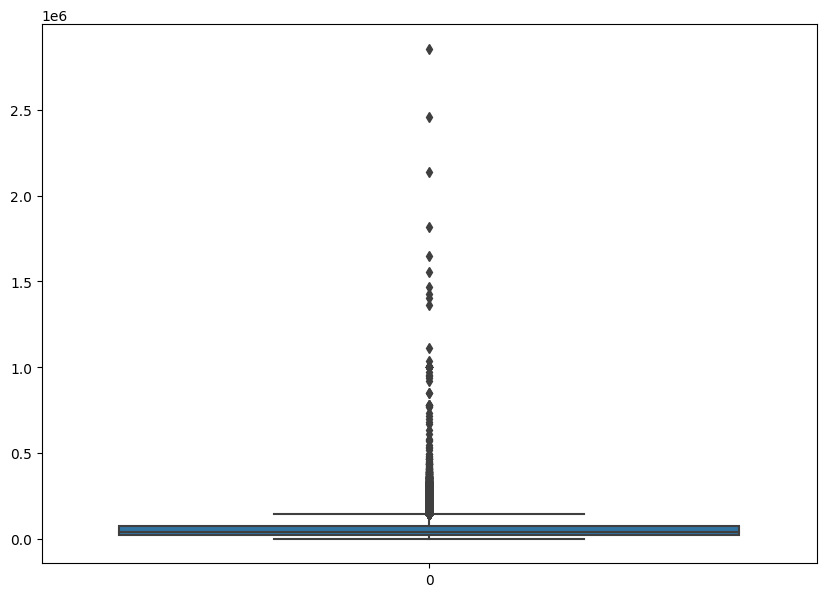

In [157]:
plt.figure(figsize=(10, 7))
sns.boxplot(df['Mileage'])

MAKE VS PRICE (Median)

<AxesSubplot: xlabel='Make', ylabel='Price'>

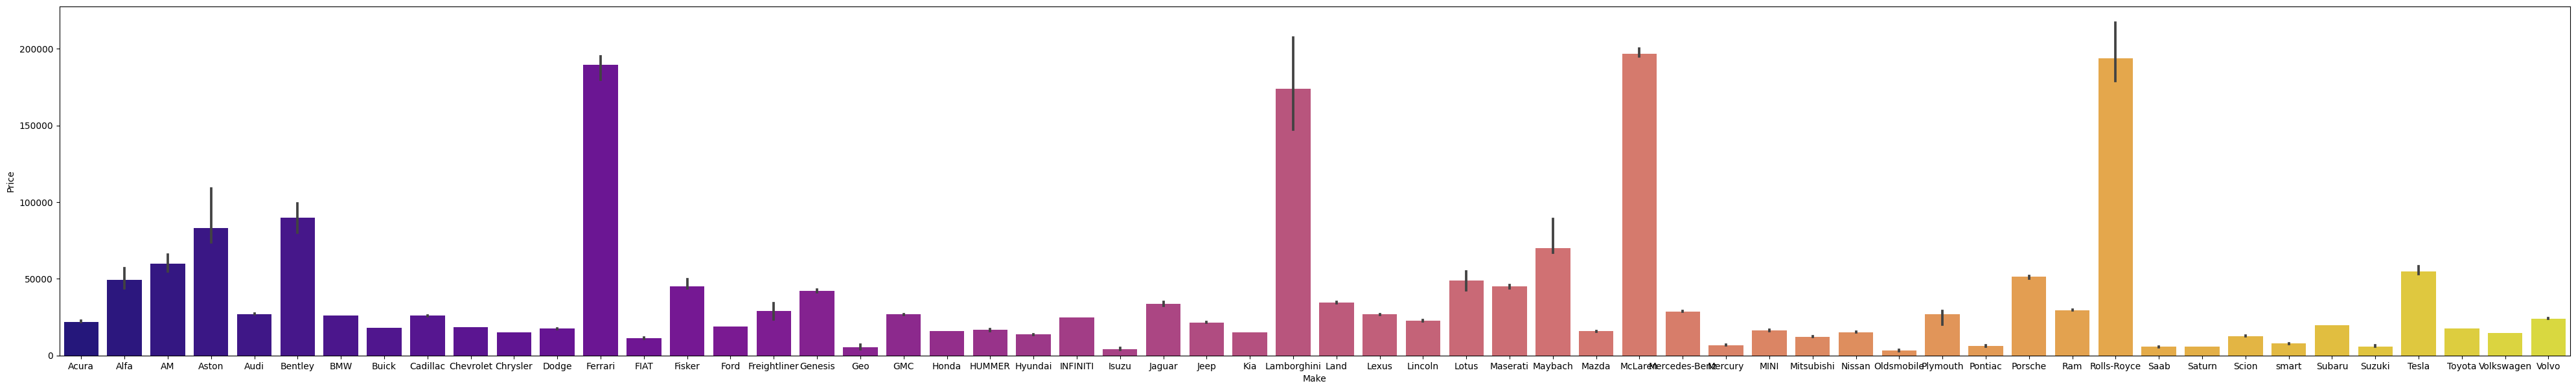

In [158]:
plt.figure(figsize=(50, 7))
sns.barplot(x ='Make', y ='Price', data = df,
            palette ='plasma', estimator = np.median)

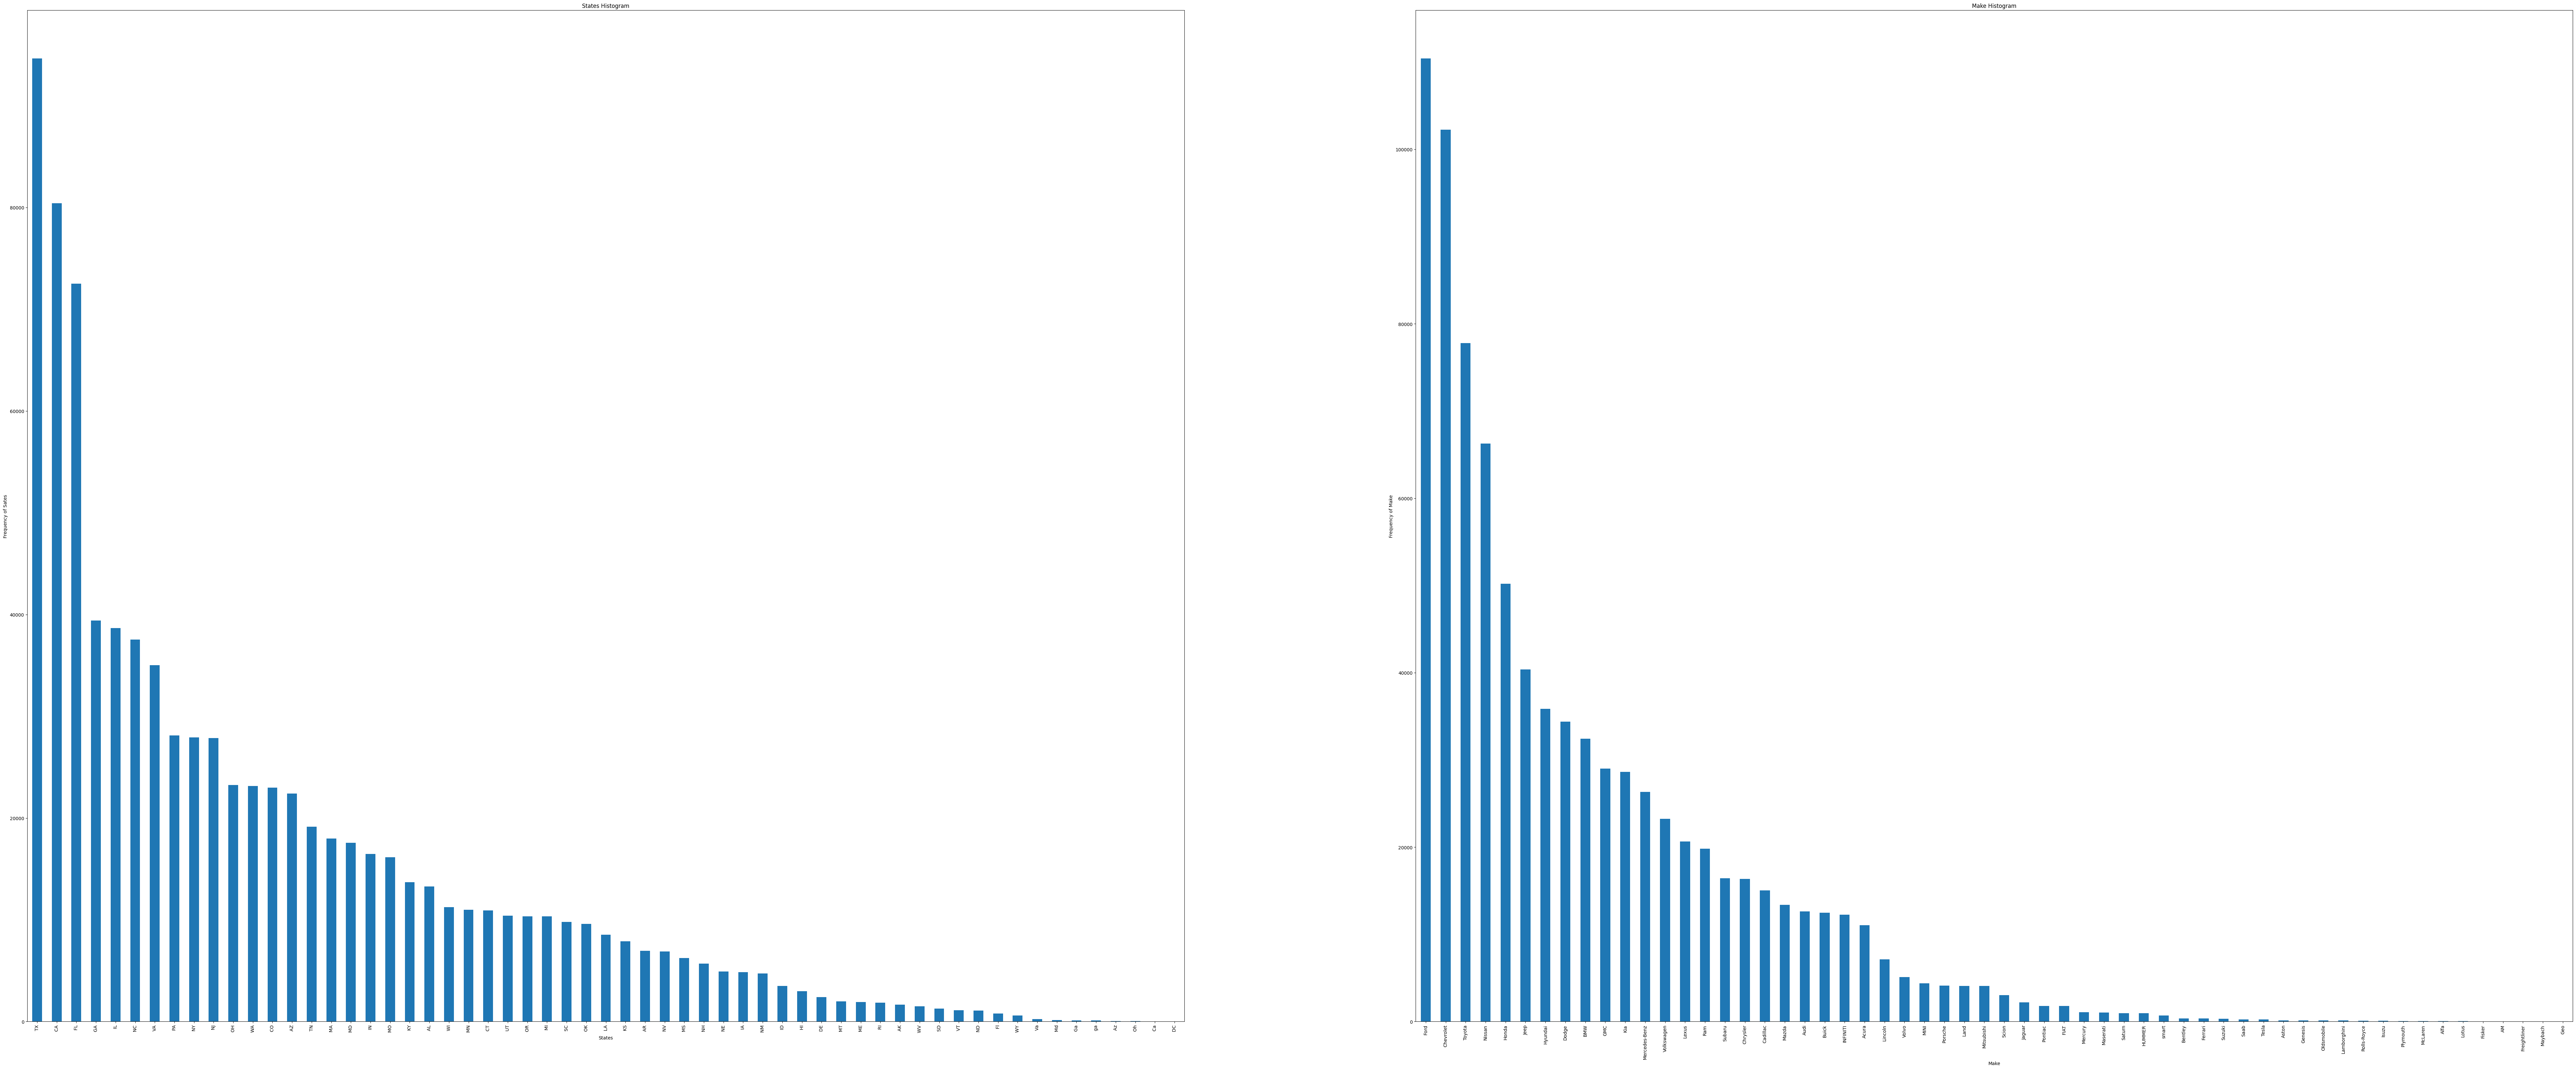

In [159]:
plt.figure(figsize=(100, 40))


plt.subplot(1,2,1)
plt1 = df.State.value_counts().plot(kind = 'bar')
plt.title('States Histogram')
plt1.set(xlabel = 'States', ylabel='Frequency of Sates')

plt.subplot(1,2,2)
plt1 = df.Make.value_counts().plot(kind = 'bar')
plt.title('Make Histogram')
plt1.set(xlabel = 'Make', ylabel='Frequency of Make')


plt.show()

1. Texas Has the highest Frequency
2. Ford has the highest number of cars

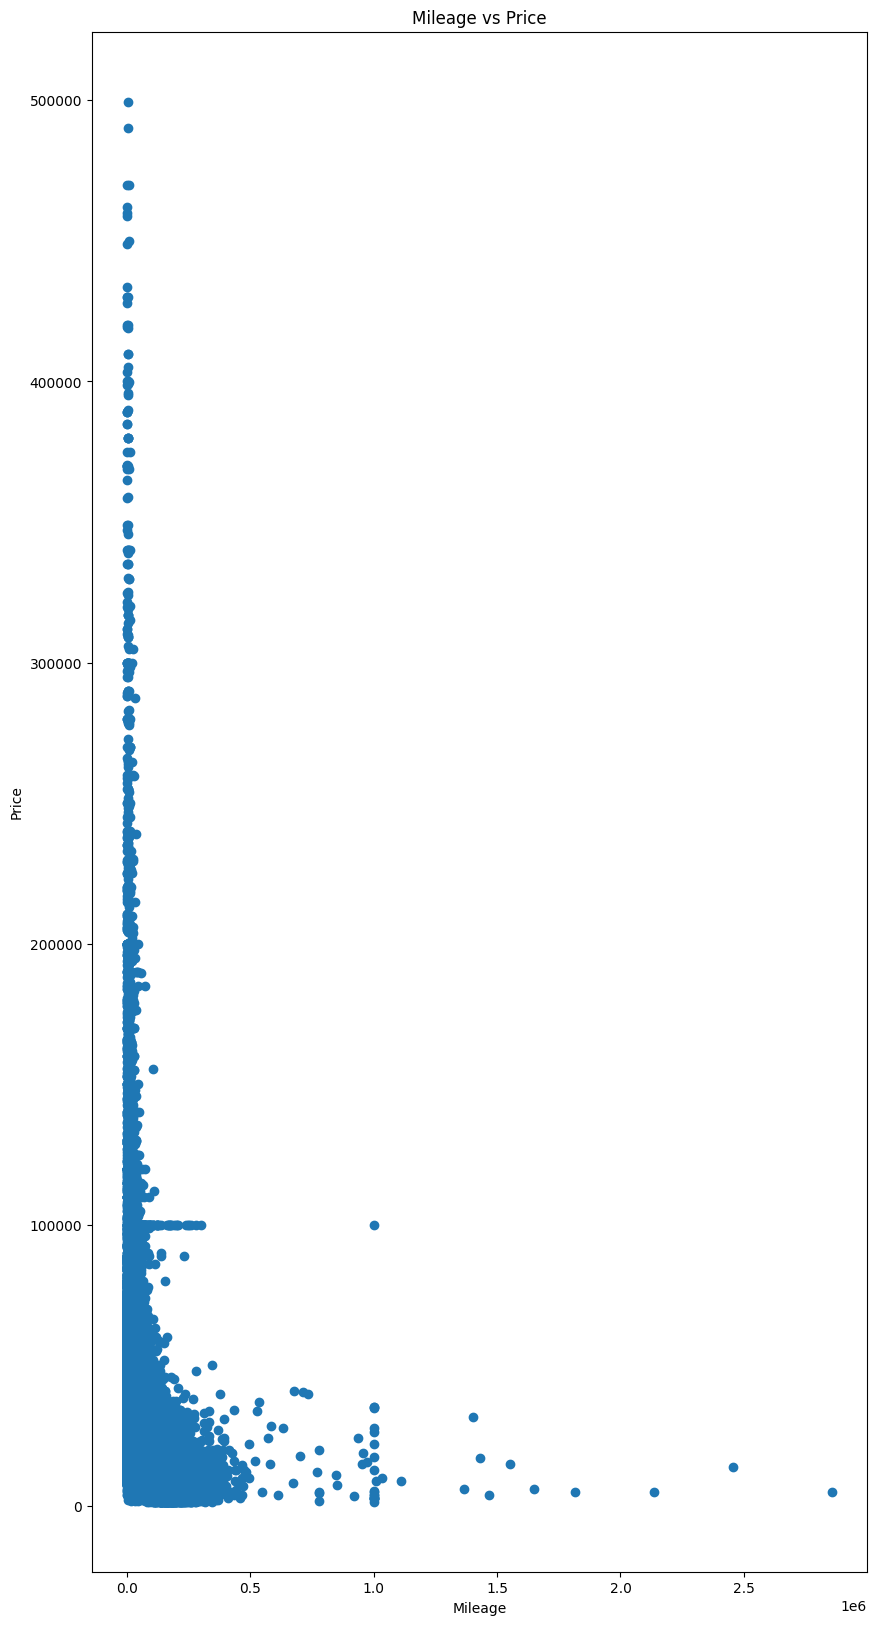

In [160]:
plt.figure(figsize=(10,20))
plt.scatter(df['Mileage'],df['Price'])
plt.title('Mileage vs Price')
plt.ylabel('Price')
plt.xlabel('Mileage')
plt.show()

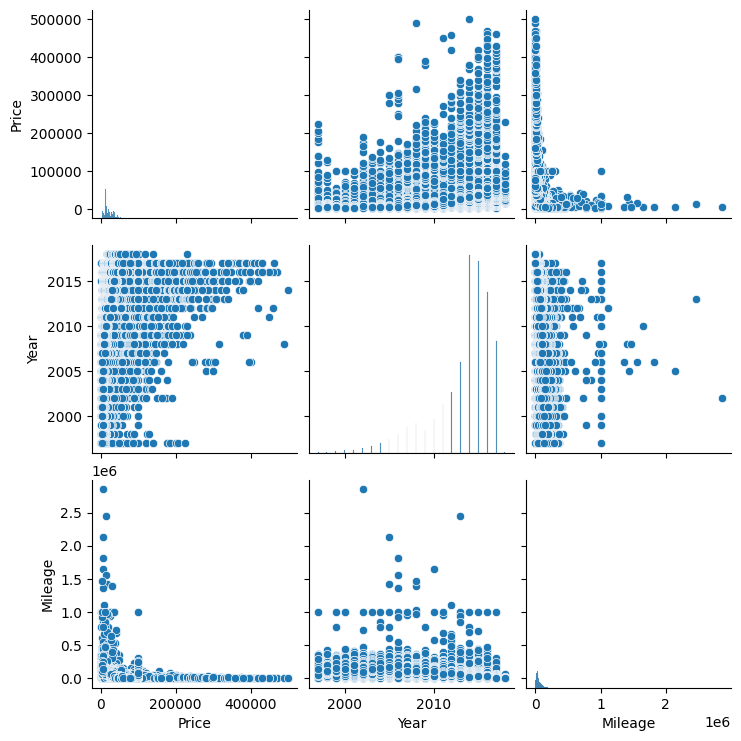

In [161]:
sns.pairplot(df)
plt.show()

Outlier Detection and Treatment

In [162]:
outliersu = np.where((df['Price']>0) & (df['Mileage']>500000))
outliersl = np.where((df['Price']>300000) & (df['Mileage']<100000))
print("Old Shape: ", df.shape)

Old Shape:  (852092, 8)


In [163]:

df.drop(outliersu[0], inplace = True)
df.drop(outliersl[0], inplace = True)
print("New Shape: ", df.shape)

New Shape:  (851943, 8)


Cleaning

In [164]:
df = df.drop('Vin',1)
df.head()

,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic


Converting categorical data into Numerical using Label Encodeing

In [165]:
df['City'] = LabelEncoder().fit_transform(df['City'])
df['State'] = LabelEncoder().fit_transform(df['State'])
df['Make'] = LabelEncoder().fit_transform(df['Make'])
df['Model'] = LabelEncoder().fit_transform(df['Model'])
df.head()

,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,646,49,1,1193
1,10888,2013,19606,1260,39,1,1192
2,8995,2013,48851,646,49,1,1193
3,10999,2014,39922,2490,6,1,1192
4,14799,2016,22142,1231,50,1,1195


X, y Split

In [166]:
X = df.iloc[:,1:7].values
y = df.iloc[:,0].values

print("X Shape : ",X.shape)
print("y Shape : ",y.shape)

X Shape :  (851943, 6)
y Shape :  (851943,)


Feature Scaling and Train test split

In [167]:
X = preprocessing.MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print("X_train Shape : ",X_train.shape)
print("y_train Shape : ",y_train.shape)
print("X_test Shape : ",X_test.shape)
print("y_test Shape : ",y_test.shape)

X_train Shape :  (681554, 6)
y_train Shape :  (681554,)
X_test Shape :  (170389, 6)
y_test Shape :  (170389,)


Multiple Linear Regression

Multiple Linear Regression
MSE:  135540884.5341268
RMSE:  11642.202735484672
R2 Score:  0.21703150096709978



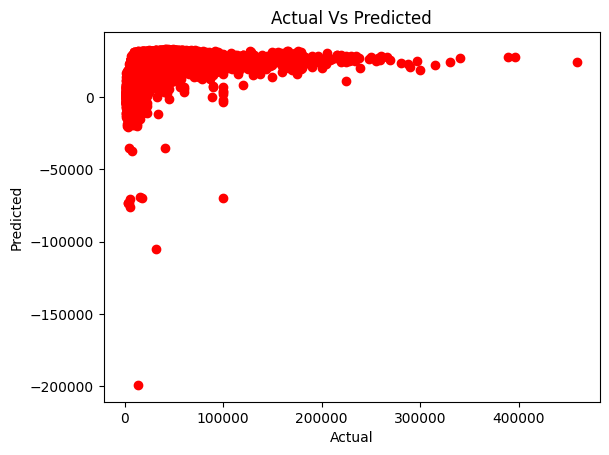

In [168]:
#Multiple Linear Regression

mlr = LinearRegression().fit(X_train,y_train)
yhat4 = mlr.predict(X_test)
MSE4 = metrics.mean_squared_error(y_test,yhat4)
RMSE4 = math.sqrt(MSE4)
MAE4 = metrics.mean_absolute_error(y_test,yhat4)
r24 = metrics.r2_score(y_test,yhat4)
print("Multiple Linear Regression")
print("MSE: ",MSE4)
print("RMSE: ",RMSE4)
print("R2 Score: ",r24)
print("")
plt.scatter(y_test, yhat4, color = 'red')
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

RANDOM FOREST REGRESSION

Random Forest Regression
MSE:  18791001.532138273
RMSE:  4334.858882609476
R2 Score:  0.8914514811120418



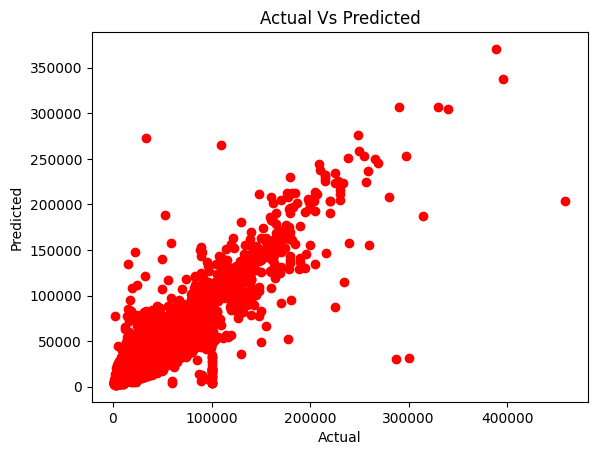

In [169]:
#Random Forest Regression

rfr = RandomForestRegressor(n_estimators = 30 , random_state = 3).fit(X_train,y_train)
yhat3 = rfr.predict(X_test)
MSE3 = metrics.mean_squared_error(y_test,yhat3)
RMSE3 = math.sqrt(MSE3)
MAE3 = metrics.mean_absolute_error(y_test,yhat3)
r23 = metrics.r2_score(y_test,yhat3)
print("Random Forest Regression")
print("MSE: ",MSE3)
print("RMSE: ",RMSE3)
print("R2 Score: ",r23)
print('')
plt.scatter(y_test, yhat3, color = 'red')
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

XGBOOST REGRESSION

XG Boost Regression
MSE:  22323789.590224054
RMSE:  4724.805772751305
R2 Score:  0.87104389875969



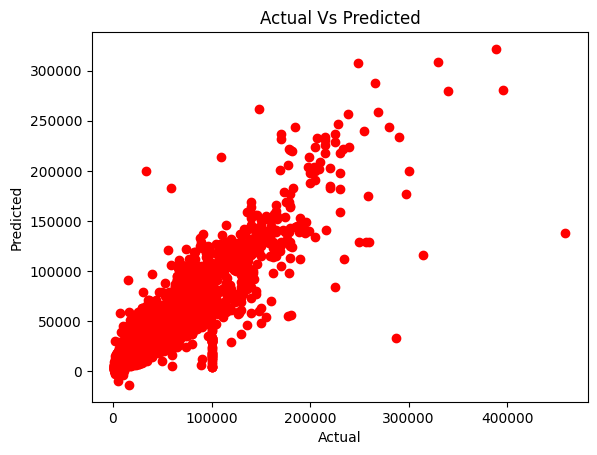

In [170]:
#XGB

xg = XGBRegressor().fit(X_train,y_train)
yhat5 = xg.predict(X_test)
MSE5 = metrics.mean_squared_error(y_test,yhat5)
RMSE5 = math.sqrt(MSE5)
MAE5 = metrics.mean_absolute_error(y_test,yhat5)
r25 = metrics.r2_score(y_test,yhat5)
print("XG Boost Regression")
print("MSE: ",MSE5)
print("RMSE: ",RMSE5)
print("R2 Score: ",r25)
print("")
plt.scatter(y_test, yhat5, color = 'red')
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

LGBM REGRESSION

LGBM
MSE:  34847690.21298274
RMSE:  5903.1932217218455
R2 Score:  0.7986980548739684



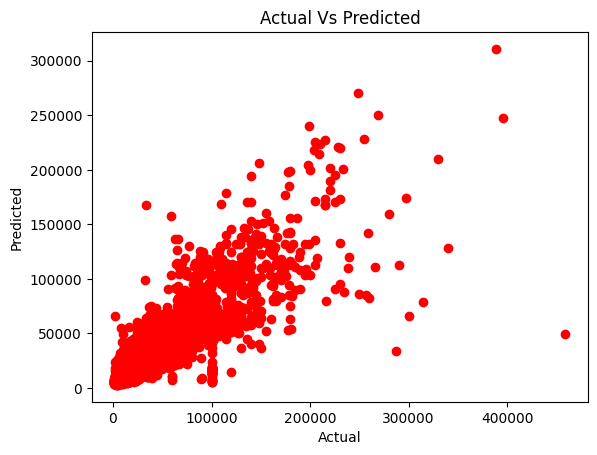

In [171]:
#LGBM
lgbm = LGBMRegressor().fit(X_train,y_train)
yhat6 = lgbm.predict(X_test)
MSE6 = metrics.mean_squared_error(y_test,yhat6)
RMSE6 = math.sqrt(MSE6)
MAE6 = metrics.mean_absolute_error(y_test,yhat6)
r26 = metrics.r2_score(y_test,yhat6)
print("LGBM")
print("MSE: ",MSE6)
print("RMSE: ",RMSE6)
print("R2 Score: ",r26)
print("")
plt.scatter(y_test, yhat6, color = 'red')
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

CATBOOST REGRESSION

Learning rate set to 0.114782
0:	learn: 12988.3512442	total: 47ms	remaining: 47s
1:	learn: 12633.4343370	total: 92.3ms	remaining: 46.1s
2:	learn: 12356.2801841	total: 134ms	remaining: 44.6s
3:	learn: 12134.7265695	total: 178ms	remaining: 44.4s
4:	learn: 11899.6353050	total: 219ms	remaining: 43.5s
5:	learn: 11673.7547933	total: 258ms	remaining: 42.7s
6:	learn: 11500.9962585	total: 302ms	remaining: 42.8s
7:	learn: 11369.8359615	total: 343ms	remaining: 42.5s
8:	learn: 11236.3799000	total: 383ms	remaining: 42.2s
9:	learn: 11121.6309599	total: 425ms	remaining: 42.1s
10:	learn: 11010.9269202	total: 464ms	remaining: 41.8s
11:	learn: 10909.7436978	total: 505ms	remaining: 41.6s
12:	learn: 10838.1972669	total: 545ms	remaining: 41.3s
13:	learn: 10745.3603806	total: 587ms	remaining: 41.3s
14:	learn: 10668.9298959	total: 630ms	remaining: 41.4s
15:	learn: 10554.8891978	total: 672ms	remaining: 41.3s
16:	learn: 10505.0195185	total: 709ms	remaining: 41s
17:	learn: 10398.6077935	total: 748ms	remaining: 

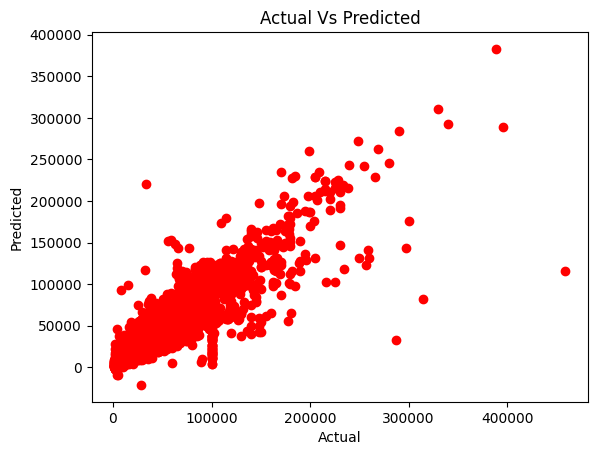

In [172]:
#CATBOOST
cb = CatBoostRegressor().fit(X_train,y_train)
yhat7 = cb.predict(X_test)
MSE7 = metrics.mean_squared_error(y_test,yhat7)
RMSE7 = math.sqrt(MSE7)
MAE7 = metrics.mean_absolute_error(y_test,yhat7)
r27 = metrics.r2_score(y_test,yhat7)
print("CATBoost")
print("MSE: ",MSE7)
print("RMSE: ",RMSE7)
print("R2 Score: ",r27)
print("")
plt.scatter(y_test, yhat7, color = 'red')
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

ANN

In [173]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=45, input_dim= X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=30, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=15, kernel_initializer='normal', activation='relu'))
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 100, epochs = 100, verbose='0')
yhat8 = model.predict(X_test)
r28 = metrics.r2_score(y_test,yhat8)
print("R2 Score: ",r28)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

Off all the Scores, the scores of Random Forest and XGBoost are the highest